A pretty great write up on SVMs:
* [Support Vector Machine — Simply Explained](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)

Another pretty great write up on SVMs:
* Part 1: [An intuitive introduction to Support Vector Machine](https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c)
* Part 2: [Visualizing SVM with Python](https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c)

In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [40]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(["dark_background"])
%matplotlib inline

# fmt: off

# Some fake data
test_grade = [90, 100, 85, 93, 88, 100, 
              97, 92, 89, 84, 55, 65, 75, 
              58, 69, 71, 72, 63, 70, 59]

project_grade = [100, 85, 98, 88, 87, 99, 
                 99, 86, 89, 100, 67, 71,
                 74, 73, 55, 59, 56, 72, 67, 72]

pass_fail = ["pass", "pass", "pass", "pass", "pass",
             "pass", "pass", "pass", "pass", "pass",
             "fail", "fail", "fail", "fail", "fail",
             "fail", "fail", "fail", "fail", "fail"]
# fmt: on

<IPython.core.display.Javascript object>

Create a dataframe using the 3 lists above as the columns.

In [6]:
df = pd.DataFrame(
    {"test_grade": test_grade, "project_grade": project_grade, "pass_fail": pass_fail}
)

<IPython.core.display.Javascript object>

Convert the pass/fail column to be 1 if the record is a `'pass'` and 0 when the record is a `'fail'`. 

In [33]:
df["is_pass"] = (df["pass_fail"] == "pass").astype(int)
df = df.drop(columns="pass_fail")
df.head()

,test_grade,project_grade,is_pass
0,90,100,1
1,100,85,1
2,85,98,1
3,93,88,1
4,88,87,1


<IPython.core.display.Javascript object>

Make a scatter plot of test scores by project scores and color by whether the record passed or failed.

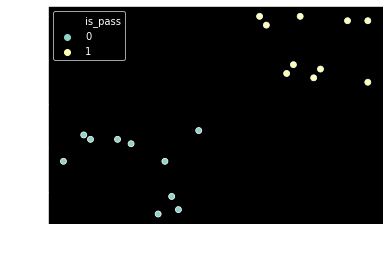

<IPython.core.display.Javascript object>

In [41]:
sns.scatterplot(x="test_grade", y="project_grade", data=df, hue="is_pass")
plt.show()

Look at the documenation for `SVC` which has already been loaded using `from sklearn.svm import SVC`.

In [14]:
# SVC?

<IPython.core.display.Javascript object>

Use the documentation to fit an `SVC` model with a kernel type of `'linear'`.  No need to do a train/test split.  The target variable should be the pass/fail column.

In [42]:
df.head()

,test_grade,project_grade,is_pass
0,90,100,1
1,100,85,1
2,85,98,1
3,93,88,1
4,88,87,1


<IPython.core.display.Javascript object>

In [35]:
# df.is_pass.unique()

array([1, 0])

<IPython.core.display.Javascript object>

In [36]:
X = df.drop(columns="is_pass")
y = df["is_pass"]

<IPython.core.display.Javascript object>

In [29]:
# SVC?

<IPython.core.display.Javascript object>

In [37]:
model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

<IPython.core.display.Javascript object>

Use the documentation of `plot_decision_regions` to plot the decision boundary of the `SVC` classifier.  The `plot_decision_regions` function was imported with the line: `from mlxtend.plotting import plot_decision_regions`.

In [18]:
# plot_decision_regions?

<IPython.core.display.Javascript object>

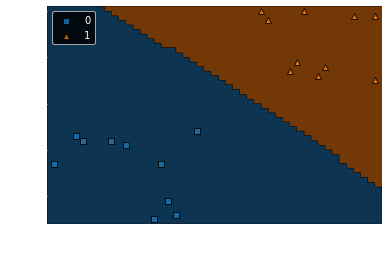

<IPython.core.display.Javascript object>

In [43]:
plot_decision_regions(np.array(X), np.array(y), model)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()

View the support vectors using your model's attribute holding this info.  Identify these points in the plot.

View the model's coefficients.  Note, these are not interpreted in the same way as linear regression.

Look what happens to the coefficients if we make one of the features useless.  We're going to give every one a project grade of 0 so that the model can only use test grades as a predictor.

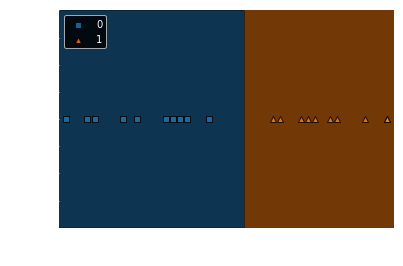

<IPython.core.display.Javascript object>

In [44]:
# Gen data
df = pd.DataFrame(
    {"test_grades": test_grade, "project_grades": 0, "pass_fail": pass_fail}
)

df["pass"] = (df["pass_fail"] == "pass").astype(int)
df = df.drop(columns=["pass_fail"])

# Prep data for model
X = df.drop(columns=["pass"])
y = df["pass"]

# Fit model
model_compare_coef = SVC(kernel="linear")
model_compare_coef.fit(X, y)

plot_decision_regions(np.array(X), np.array(y), model_compare_coef)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()

With scaled data and a `'linear'` kernel, the magnitude of the coefficients provide an indication of feature importance.  Note these are not intrepreted in the same way as linear regression coefficients.

In [45]:
model_compare_coef.coef_

array([[0.22222222, 0.        ]])

<IPython.core.display.Javascript object>

-----

Create a dataframe with new records to classify.

* For the 1st record, use 90 as the test score and 73 as the project score.
* For the 2nd record, use 90 as the test score and 72 as the project score.

Make predictions of pass/fail for both of these records and add a column to the dataframe to hold these predictions. Call this column the same thing as the y column in your original dataframe.

Combine this dataframe with the original one and replot the decision boundary with these 2 points included.

Re-plot the decision boundary and include these 2 new points.

In [ ]:
plot_decision_regions(____)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()